# DataBase arrange & research

### Intro: The work starts with an incomplete DB property of the University of Vigo, which contains Financial Data of 380 enterprises. It wants to talk about financial health, and this data wants to study the difference between enterprises helped by a Busisness Incubator or not, to determine if it's something relevant on their survival.  

### Target: prepare data & analyze the boolean (incubated or not) 

## Step 1: DB preparation

In [1]:
# Libraries I Will use (mainly)

import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

##### On first view we can see a DB with 50 variables (dates , booleans, ratios, accounting info, etc. )

In [2]:
# DB view
datos=pd.read_csv ('/users/Sergio/Downloads/datosuvigo.csv')
datos.head(n=3)

,ID,Añonatural3,Fechaconstitución,Estadodummy,Incubada,ActividadInternacionalDummy,CantidadMarcasenpropiedad,Provincia,cnae2d,Edad_días3,...,gtosexplotratio_mean,pasivototal_mean,debtassetratio_mean,cashflowratio_mean,ratiocoberturaintereses_mean,tangibleratio_mean,equityperemployee_mean,salesperemployee_mean,innovationperemployee_mean,innovationtosales_mean
0,1,2019,21/12/2009,0,1,1,0,Madrid,71,3662,...,"-0,636",NaN,NaN,NaN,NaN,NaN,"-25,124","23,353","8,911","0,364"
1,2,2019,15/4/2008,0,1,1,5,Madrid,72,4277,...,"-1,705","3016,740","0,454","0,074","4,979","6,103","341,504","20,945","40,622","1,966"
2,3,2019,2/11/2011,0,1,0,1,Pontevedra,73,2981,...,"-0,228",NaN,NaN,NaN,"-83,979","4,781","8,881","124,913","41,609","0,346"


#### 1.1- Checking how much unfilled Data

In [3]:
# Number of empty data on each column (variable)
datos.isnull().sum().sort_values()

ID                                   0
año_constitucion                     0
cnae2d                               0
Provincia                            0
CantidadMarcasenpropiedad            0
Edad_días3                           0
Incubada                             0
Estadodummy                          0
Fechaconstitución                    0
Añonatural3                          0
ActividadInternacionalDummy          0
VA_mean                              5
Fondospropios_mean                   6
Activocorriente_mean                 6
Totalpatrimonionetoypasivo_mean      6
Patrimonioneto_mean                  6
RatioEndeudamiento_mean              6
liquidez_mean                        9
fondomaniobra_mean                   9
OtrosGtosExp_mean                    9
Resultadodeexplotación_mean          9
Pasivocorriente_mean                 9
innovationtosales_mean              14
gtosexplotratio_mean                14
margenbruto_mean                    14
Ventasnetas_mean         

In [4]:
# There are 2 booleans: Incubated (Business Incubator/not) and Estadodummy (Dead/live)

# Creation of Table to count Data on each Boolean:
from tabulate import tabulate


tabla = [[' ', ' ', 'Estadodummy','Estadodummy','Total'], 
         [' ', ' ', 'Viva','Muerta',' '], 
         ['Incubada:', 'No', sum((datos.Incubada == 0)& (datos.Estadodummy == 0)),
          sum((datos.Incubada == 0)& (datos.Estadodummy == 1)),sum(datos.Incubada == 0)],
         ['Incubada:', 'Si', sum((datos.Incubada == 1)& (datos.Estadodummy == 0)),
          sum((datos.Incubada == 1)& (datos.Estadodummy == 1)),sum(datos.Incubada == 1)],
        [' ','Total',sum(datos.Estadodummy == 0),sum(datos.Estadodummy == 1),datos['Incubada'].count()]]

print ("Datos Totales")
print(tabulate(tabla))


# Second table to count rows filled completely and same structure as first 
datossinnan=datos
datossinnan=datossinnan.dropna()

tabla = [[' ', ' ', 'Estadodummy','Estadodummy','Total'], 
         [' ', ' ', 'Viva','Muerta',' '], 
         ['Incubada:', 'No', sum((datossinnan.Incubada == 0)& (datossinnan.Estadodummy == 0)),
          sum((datossinnan.Incubada == 0)& (datossinnan.Estadodummy == 1)),sum(datossinnan.Incubada == 0)],
         ['Incubada:', 'Si', sum((datossinnan.Incubada == 1)& (datossinnan.Estadodummy == 0)),
          sum((datossinnan.Incubada == 1)& (datossinnan.Estadodummy == 1)),sum(datossinnan.Incubada == 1)],
        [' ','Total',sum(datossinnan.Estadodummy == 0),sum(datossinnan.Estadodummy == 1),datossinnan['Incubada'].count()]]

print (3* "\n" + "Datos con todas las variables completas")
print(tabulate(tabla))

Datos Totales
---------  -----  -----------  -----------  -----
                  Estadodummy  Estadodummy  Total
                  Viva         Muerta
Incubada:  No     129          61           190
Incubada:  Si     129          61           190
           Total  258          122          380
---------  -----  -----------  -----------  -----



Datos con todas las variables completas
---------  -----  -----------  -----------  -----
                  Estadodummy  Estadodummy  Total
                  Viva         Muerta
Incubada:  No     57           25           82
Incubada:  Si     64           24           88
           Total  121          49           170
---------  -----  -----------  -----------  -----


##### Fortunately, we can see that unfilled data is proportional to the booleans, so this will make more viable to predict all of them, the requested method to do it is going to be by Nearest Neighbors with Machine Learning.

##### First, we can appreciate that at less there are 6 unfilled data on each variable SO I decided to check if "maybe" there are 6 rows with all the variables unfilled, because in that case, Nearest Neighbors will invent random data and that is not interesting for the study

#### 1.2- Check if there are unfilled ROWS (enterprises with no Data) and eliminate them

In [5]:
# To check this, I selected the variables with only 6 rows empty and get the location , as we will see, locations coincide 
# and that is the indication to suspect that there are 6 enterprises with no data 


print (np.where(datos["Activocorriente_mean"].isnull()))
print (np.where(datos["Totalpatrimonionetoypasivo_mean"].isnull()))
print (np.where(datos["Patrimonioneto_mean"].isnull()))
print (np.where(datos["Totalpatrimonionetoypasivo_mean"].isnull()))
print (np.where(datos["Fondospropios_mean"].isnull()))
print (np.where(datos["RatioEndeudamiento_mean"].isnull()))

# As it coincides, I print those rows and detect that it was true

print(datos.iloc[22])
print(datos.iloc[129])
print(datos.iloc[155])
print(datos.iloc[162])
print(datos.iloc[189])
print(datos.iloc[297])

# So that data is not valid for the study and I eliminate it
datos=datos.drop([22,129,155,162,189,297])

# I checked next lowests but they contain data and were not on the same location


(array([ 22, 129, 155, 162, 189, 297], dtype=int64),)
(array([ 22, 129, 155, 162, 189, 297], dtype=int64),)
(array([ 22, 129, 155, 162, 189, 297], dtype=int64),)
(array([ 22, 129, 155, 162, 189, 297], dtype=int64),)
(array([ 22, 129, 155, 162, 189, 297], dtype=int64),)
(array([ 22, 129, 155, 162, 189, 297], dtype=int64),)
ID                                         24
Añonatural3                              2019
Fechaconstitución                  10/10/2008
Estadodummy                                 0
Incubada                                    1
ActividadInternacionalDummy                 0
CantidadMarcasenpropiedad                   1
Provincia                            a Coruña
cnae2d                                     69
Edad_días3                               4099
año_constitucion                         2008
Númeroempleados_mean                      NaN
Activonocorriente_mean                    NaN
Activocorriente_mean                      NaN
Pasivonocorriente_mean          

#### 1.3- Arrange Data Format

In [6]:
datos.dtypes

ID                                  int64
Añonatural3                         int64
Fechaconstitución                  object
Estadodummy                         int64
Incubada                            int64
ActividadInternacionalDummy         int64
CantidadMarcasenpropiedad           int64
Provincia                          object
cnae2d                              int64
Edad_días3                          int64
año_constitucion                    int64
Númeroempleados_mean               object
Activonocorriente_mean             object
Activocorriente_mean               object
Pasivonocorriente_mean             object
Pasivocorriente_mean               object
Totalpatrimonionetoypasivo_mean    object
Patrimonioneto_mean                object
Fondospropios_mean                 object
RatioEndeudamiento_mean            object
Ventasnetas_mean                   object
Gastosdepersonal_mean              object
OtrosGtosExp_mean                  object
Amortizacion_mean                 

In [7]:
# Not relevant data
Outdata=datos.filter(["Provincia","Fechaconstitución"], axis=1)
datos=datos.drop(["Fechaconstitución"], axis= 1)
datos=datos.drop(["Provincia"], axis= 1)

In [8]:
datos.iloc[1]

ID                                        2
Añonatural3                            2019
Estadodummy                               0
Incubada                                  1
ActividadInternacionalDummy               1
CantidadMarcasenpropiedad                 5
cnae2d                                   72
Edad_días3                             4277
año_constitucion                       2008
Númeroempleados_mean                  9,667
Activonocorriente_mean             5733,195
Activocorriente_mean                910,992
Pasivonocorriente_mean             2218,849
Pasivocorriente_mean                797,891
Totalpatrimonionetoypasivo_mean    6644,187
Patrimonioneto_mean                3627,447
Fondospropios_mean                 3286,570
RatioEndeudamiento_mean              38,645
Ventasnetas_mean                    203,289
Gastosdepersonal_mean              -610,702
OtrosGtosExp_mean                  -342,263
Amortizacion_mean                  -431,893
Resultadodeexplotación_mean     

###### Data is not on the right format, and It is also really messy ( comma "," means decimal in some variables and thousand in others, and also expenses variables are marked as negative but it must be on positive , so let's go

In [10]:
# As they are actually objects:
# "," means decimal, I use "." to python
datos['Númeroempleados_mean'] = datos['Númeroempleados_mean'].str.replace(',','.')
datos["equity_mean"]= datos["equity_mean"].str.replace(',','.')
datos["ratiofondomaniobra_mean"]= datos["ratiofondomaniobra_mean"].str.replace(',','.')
datos["eficiencia_mean"]= datos["eficiencia_mean"].str.replace(',','.')
datos["debtassetratio_mean"]= datos["debtassetratio_mean"].str.replace(',','.')
datos["cashflowratio_mean"]= datos["cashflowratio_mean"].str.replace(',','.')
datos["ratiocoberturaintereses_mean"]= datos["ratiocoberturaintereses_mean"].str.replace(',','.')
datos["tangibleratio_mean"]= datos["tangibleratio_mean"].str.replace(',','.')
datos["RatioEndeudamiento_mean"]= datos["RatioEndeudamiento_mean"].str.replace(',','.')


# "," means thousands I quit it

datos["Activonocorriente_mean"]= datos["Activonocorriente_mean"].str.replace(',','')
datos["Activocorriente_mean"]= datos["Activocorriente_mean"].str.replace(',','')
datos["Pasivonocorriente_mean"]= datos["Pasivonocorriente_mean"].str.replace(',','')
datos["Pasivocorriente_mean"]= datos["Pasivocorriente_mean"].str.replace(',','')
datos["Totalpatrimonionetoypasivo_mean"]= datos["Totalpatrimonionetoypasivo_mean"].str.replace(',','')
datos["Patrimonioneto_mean"]= datos["Patrimonioneto_mean"].str.replace(',','')
datos["Fondospropios_mean"]= datos["Fondospropios_mean"].str.replace(',','')

datos["Ventasnetas_mean"]= datos["Ventasnetas_mean"].str.replace(',','')
datos["Gastosdepersonal_mean"]= datos["Gastosdepersonal_mean"].str.replace(',','')
datos["OtrosGtosExp_mean"]= datos["OtrosGtosExp_mean"].str.replace(',','')
datos["Amortizacion_mean"]= datos["Amortizacion_mean"].str.replace(',','')
datos["Resultadodeexplotación_mean"]= datos["Resultadodeexplotación_mean"].str.replace(',','')
datos["Resultadofinanciero_mean"]= datos["Resultadofinanciero_mean"].str.replace(',','')
datos["Efectivo_mean"]= datos["Efectivo_mean"].str.replace(',','')
datos["Gastosfin_mean"]= datos["Gastosfin_mean"].str.replace(',','')
datos["InmovMat_mean"]= datos["InmovMat_mean"].str.replace(',','')
datos["Gastosfin_mean"]= datos["Gastosfin_mean"].str.replace(',','')
datos["Aprovisiona_mean"]= datos["Aprovisiona_mean"].str.replace(',','')
datos["VA_mean"]= datos["VA_mean"].str.replace(',','')
datos["fondomaniobra_mean"]= datos["fondomaniobra_mean"].str.replace(',','')
datos["totalactivo_mean"]= datos["totalactivo_mean"].str.replace(',','')


datos["liquidez_mean"]= datos["liquidez_mean"].str.replace(',','')
datos["margenbruto_mean"]= datos["margenbruto_mean"].str.replace(',','')
datos["materiales_mean"]= datos["materiales_mean"].str.replace(',','')
datos["costelaboral_mean"]= datos["costelaboral_mean"].str.replace(',','')
datos["gtosexplotratio_mean"]= datos["gtosexplotratio_mean"].str.replace(',','')
datos["pasivototal_mean"]= datos["pasivototal_mean"].str.replace(',','')

datos["equityperemployee_mean"]= datos["equityperemployee_mean"].str.replace(',','')
datos["salesperemployee_mean"]= datos["salesperemployee_mean"].str.replace(',','')
datos["innovationperemployee_mean"]= datos["innovationperemployee_mean"].str.replace(',','')
datos["innovationtosales_mean"]= datos["innovationtosales_mean"].str.replace(',','')



# Changing expenses variables to positive
datos["Gastosdepersonal_mean"]= datos["Gastosdepersonal_mean"].str.replace('-','')
datos["OtrosGtosExp_mean"]= datos["OtrosGtosExp_mean"].str.replace('-','')
datos["Gastosfin_mean"]= datos["Gastosfin_mean"].str.replace('-','')
datos["Aprovisiona_mean"]= datos["Aprovisiona_mean"].str.replace('-','')
datos["materiales_mean"]= datos["materiales_mean"].str.replace('-','')
datos["costelaboral_mean"]= datos["costelaboral_mean"].str.replace('-','')
datos["gtosexplotratio_mean"]= datos["gtosexplotratio_mean"].str.replace('-','')



# #####################
# Giving right format (float)
datos['Incubada']=datos['Incubada'].astype(bool)
datos['Estadodummy']=datos['Estadodummy'].astype(bool)

datos['Númeroempleados_mean'] = datos['Númeroempleados_mean'].astype(float)
datos["RatioEndeudamiento_mean"]= datos["RatioEndeudamiento_mean"].astype(float)
datos["ratiofondomaniobra_mean"]= datos["ratiofondomaniobra_mean"].astype(float)
datos["equity_mean"]= datos["equity_mean"].astype(float)
datos["eficiencia_mean"]= datos["eficiencia_mean"].astype(float)
datos["debtassetratio_mean"]= datos["debtassetratio_mean"].astype(float)
datos["cashflowratio_mean"]= datos["cashflowratio_mean"].astype(float)
datos["ratiocoberturaintereses_mean"]= datos["ratiocoberturaintereses_mean"].astype(float)
datos["tangibleratio_mean"]= datos["tangibleratio_mean"].astype(float)



datos["Activonocorriente_mean"]= datos["Activonocorriente_mean"].astype(float)
datos["Activocorriente_mean"]= datos["Activocorriente_mean"].astype(float)
datos["Pasivonocorriente_mean"]= datos["Pasivonocorriente_mean"].astype(float)
datos["Pasivocorriente_mean"]= datos["Pasivocorriente_mean"].astype(float)
datos["Totalpatrimonionetoypasivo_mean"]= datos["Totalpatrimonionetoypasivo_mean"].astype(float)
datos["Patrimonioneto_mean"]= datos["Patrimonioneto_mean"].astype(float)
datos["Fondospropios_mean"]= datos["Fondospropios_mean"].astype(float)

datos["Ventasnetas_mean"]= datos["Ventasnetas_mean"].astype(float)
datos["Gastosdepersonal_mean"]= datos["Gastosdepersonal_mean"].astype(float)
datos["OtrosGtosExp_mean"]= datos["OtrosGtosExp_mean"].astype(float)
datos["Amortizacion_mean"]= datos["Amortizacion_mean"].astype(float)
datos["Resultadodeexplotación_mean"]= datos["Resultadodeexplotación_mean"].astype(float)
datos["Resultadofinanciero_mean"]= datos["Resultadofinanciero_mean"].astype(float)
datos["Efectivo_mean"]= datos["Efectivo_mean"].astype(float)
datos["InmovMat_mean"]= datos["InmovMat_mean"].astype(float)
datos["Gastosfin_mean"]= datos["Gastosfin_mean"].astype(float)
datos["Aprovisiona_mean"]= datos["Aprovisiona_mean"].astype(float)
datos["VA_mean"]= datos["VA_mean"].astype(float)
datos["fondomaniobra_mean"]= datos["fondomaniobra_mean"].astype(float)
datos["totalactivo_mean"]= datos["totalactivo_mean"].astype(float)

datos["liquidez_mean"]= datos["liquidez_mean"].astype(float)
datos["margenbruto_mean"]= datos["margenbruto_mean"].astype(float)
datos["materiales_mean"]= datos["materiales_mean"].astype(float)
datos["costelaboral_mean"]= datos["costelaboral_mean"].astype(float)
datos["gtosexplotratio_mean"]= datos["gtosexplotratio_mean"].astype(float)
datos["pasivototal_mean"]= datos["pasivototal_mean"].astype(float)

datos["equityperemployee_mean"]= datos["equityperemployee_mean"].astype(float)
datos["salesperemployee_mean"]= datos["salesperemployee_mean"].astype(float)
datos["innovationperemployee_mean"]= datos["innovationperemployee_mean"].astype(float)
datos["innovationtosales_mean"]= datos["innovationtosales_mean"].astype(float)

datos.iloc[3]

ID                                         4
Añonatural3                             2019
Estadodummy                            False
Incubada                                True
ActividadInternacionalDummy                0
CantidadMarcasenpropiedad                  1
cnae2d                                    49
Edad_días3                              5405
año_constitucion                        2005
Númeroempleados_mean                  14.667
Activonocorriente_mean              829790.0
Activocorriente_mean                185009.0
Pasivonocorriente_mean              210161.0
Pasivocorriente_mean                201395.0
Totalpatrimonionetoypasivo_mean    1014799.0
Patrimonioneto_mean                 603244.0
Fondospropios_mean                  603244.0
RatioEndeudamiento_mean               30.248
Ventasnetas_mean                    891052.0
Gastosdepersonal_mean               420984.0
OtrosGtosExp_mean                   280177.0
Amortizacion_mean                  -109909.0
Resultadod

### 1.4- Correlations

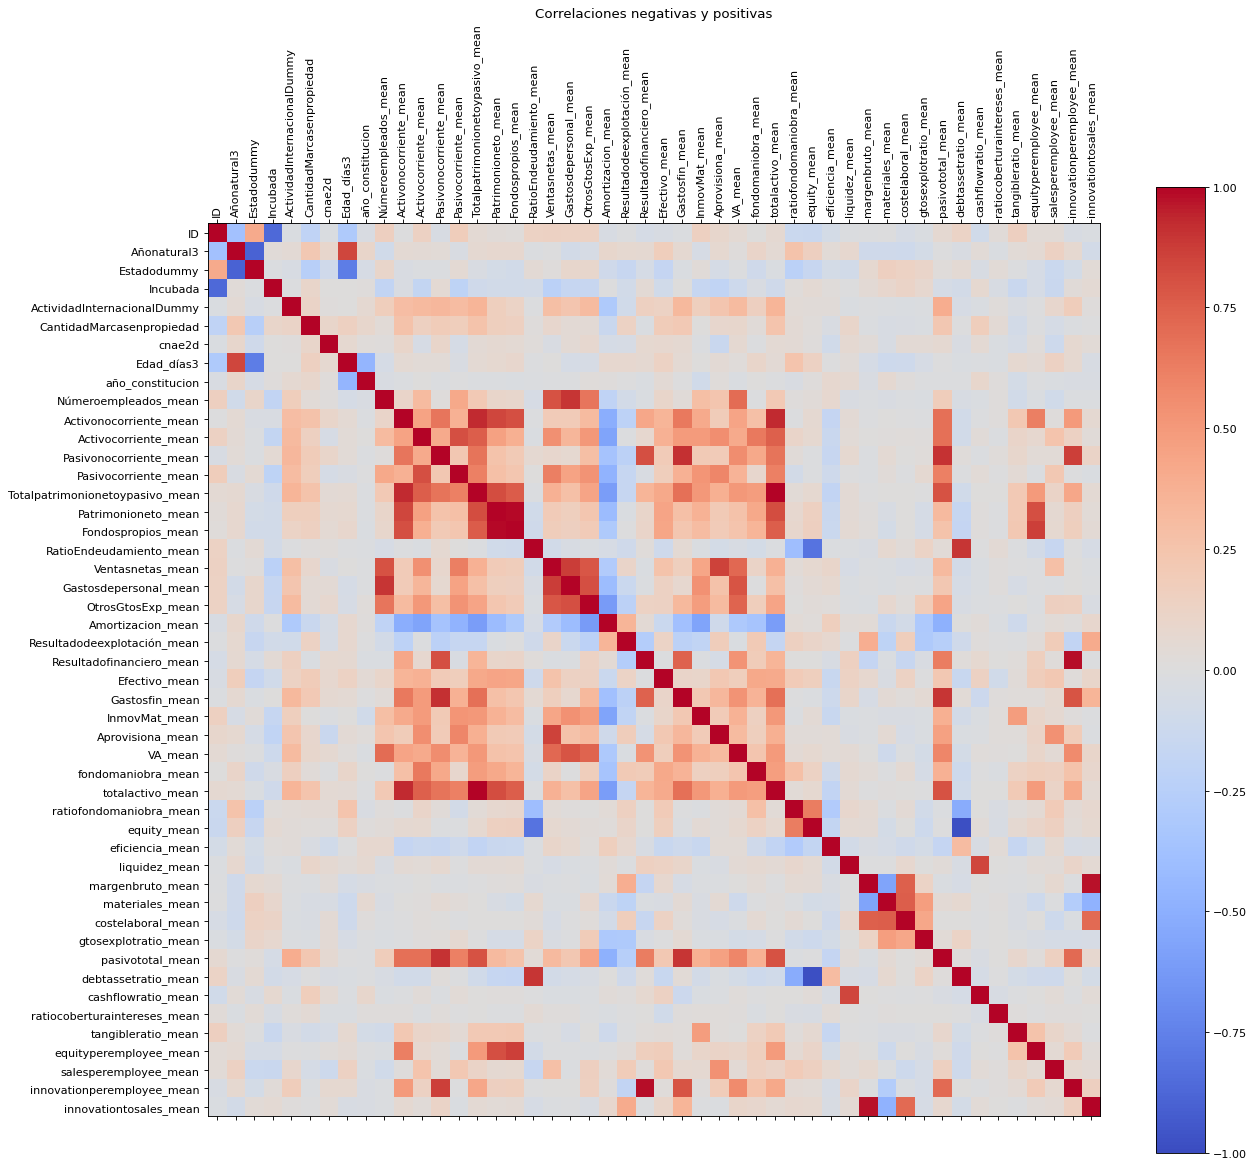

In [11]:
corr = datos.corr()
fig = plt.figure(figsize=(18, 16), dpi=80)

ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(datos.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(datos.columns)
ax.set_yticklabels(datos.columns)
plt.title("Correlaciones negativas y positivas")
plt.show()

### 1.5- MachineLearning KNN

In [12]:
from sklearn.impute import KNNImputer

###### KNN is an algorithm correct for multidimensional variables that allows to predict classification but also values like in this case. The point is that is multidimensional, so it uses more than 1 variable for their predictions. 

##### On this case we have more than 40 variables and a good bunch of correlations to predict each one. 

##### The precission of KNN should depend of the number of nearest neighbors selected (K). To determine K it's common to divide Data on Train and Test and check the accuracy on different Ks, but this case has to predict values on all variables and not just one column and it takes me to a faster way and more viable that is look at the density for each K , the density nearest to the Original distribution must be more accurate. 

##### We can see that because of the quantity of variables ( that make the algorithm richer) Density does not have relevant changes so any K would have the same accuracy according to the graph plotted. 



In [31]:
density = datos.copy(deep=True)

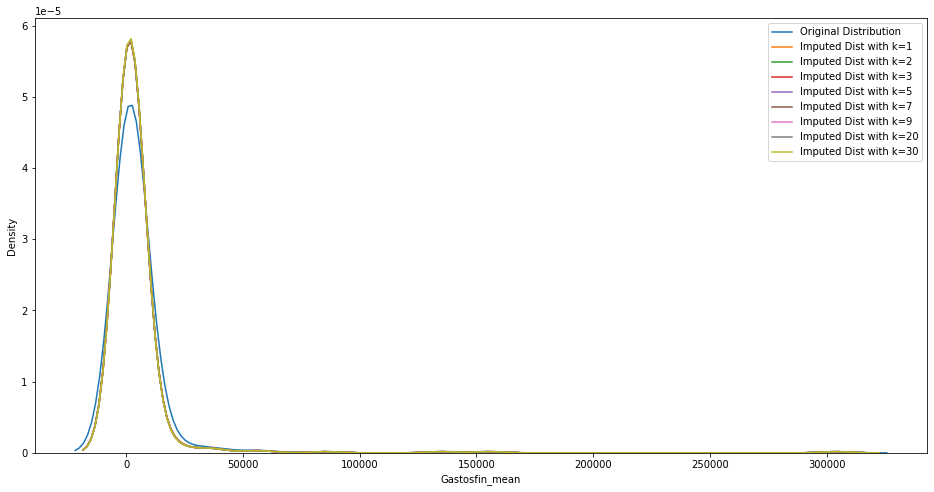

In [32]:
# Density 

n_neighbors = [1, 2, 3, 5, 7, 9, 20, 30]

fig, ax = plt.subplots(figsize=(16, 8))
# Plot the original distribution
sb.kdeplot(datos.Gastosfin_mean, label="Original Distribution")
for k in n_neighbors:
    knn_imp = KNNImputer(n_neighbors=k)
    density.loc[:, :] = knn_imp.fit_transform(datos)
    sb.kdeplot(density.Gastosfin_mean, label=f"Imputed Dist with k={k}")

plt.legend();

##### I just want to go one step foward and be original to select the best K anyway, so I will test different values of K with a personal though: I decided to apply a bunch of KNNImputers with different K and test in 2 variables , and checking that results I will get the nearest to the mean of all the results, so I will get a K in the center of that % of difference between different values of K.  As we will see, difference is not relevant and It is 1.7% and 1% on each variable tested, going from 2 to 30 neighbors, but that can give and intermediate point on that variation. 

In [47]:
# k= 2
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
datos2knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 3
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
datos3knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 4
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)
datos4knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 5
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
datos5knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 6
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=6)
datos6knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 7
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)
datos7knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 8
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=8)
datos8knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 9
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=9)
datos9knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 10
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
datos10knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 11
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=11)
datos11knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 13
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=13)
datos13knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 15
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=15)
datos15knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 17
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=17)
datos17knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 20
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=20)
datos20knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 25
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=25)
datos25knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

# k= 30
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=30)
datos30knn = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)


In [58]:
###SELECCIÓN#### Pasivonocorriente_mean             138
# pasivototal_mean                   138
# debtassetratio_mean                142
# cashflowratio_mean                 147

print ("Mean of K imputers means:")
print (datos2knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos3knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos4knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos5knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos6knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos7knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos8knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos9knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos10knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos11knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos13knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos15knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos17knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos20knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos25knn["Pasivonocorriente_mean"].mean(axis=0))
print (datos30knn["Pasivonocorriente_mean"].mean(axis=0))

# comprobamos que no es una media y que se utilizaron KNN 
# con la media de los datos originales
print ("MEAN WITHOUT IMPUTED DATA: as we see, results doesn't have to view with the Mean because it depends of the variables for rows")
print (datos["Pasivonocorriente_mean"].mean(axis=0))

print (3* "\n"+"varition in %:")
print (((168228-165403)*100)/168228 )
print ("desperciable")
print( 3* "\n" +"Mean point (mean of K imputers means):")
print ((datos2knn["Pasivonocorriente_mean"].mean(axis=0)+datos3knn["Pasivonocorriente_mean"].mean(axis=0)+datos4knn["Pasivonocorriente_mean"].mean(axis=0)+
       datos5knn["Pasivonocorriente_mean"].mean(axis=0)+datos6knn["Pasivonocorriente_mean"].mean(axis=0)+datos7knn["Pasivonocorriente_mean"].mean(axis=0)+datos8knn["Pasivonocorriente_mean"].mean(axis=0)+
       datos9knn["Pasivonocorriente_mean"].mean(axis=0)+datos10knn["Pasivonocorriente_mean"].mean(axis=0)+datos11knn["Pasivonocorriente_mean"].mean(axis=0)+datos13knn["Pasivonocorriente_mean"].mean(axis=0)+
      datos15knn["Pasivonocorriente_mean"].mean(axis=0)+datos17knn["Pasivonocorriente_mean"].mean(axis=0)+datos20knn["Pasivonocorriente_mean"].mean(axis=0)+
       datos25knn["Pasivonocorriente_mean"].mean(axis=0)+datos30knn["Pasivonocorriente_mean"].mean(axis=0))/16)

print (2* "\n" + "Best Neighbors")
print ( "\n"+"First near (to mean of K imputers means): ")
print ("K = 9 = 167014")
print ("Nearest: ")
print ("K= 13 = 166983")

Mean of K imputers means:
165403.02272727274
165696.67201426026
166500.95788770053
166582.4395721925
166635.42869875222
166789.58403361344
166780.29779411765
167014.08972073678
167163.6625668449
167187.2287311619
166983.56602221308
167231.14438502674
167381.59515570934
167807.43395721924
168045.1894117647
168228.8389483066
MEAN WITHOUT IMPUTED DATA: as we see, results doesn't have to view with the Mean because it depends of the variables for rows
242393.71487603305



varition in %:
1.6792686116460993
desperciable



Mean point (mean of K imputers means):
166964.44697668077


Best Neighbors

First near (to mean of K imputers means): 
K = 9 = 167014
Nearest: 
K= 13 = 166983


In [59]:
# Pasivonocorriente_mean             138
####SELECCIÓN#### pasivototal_mean                   138
# debtassetratio_mean                142
# cashflowratio_mean                 147

print ("Mean of K imputers means:")
print (datos2knn["pasivototal_mean"].mean(axis=0))
print (datos3knn["pasivototal_mean"].mean(axis=0))
print (datos4knn["pasivototal_mean"].mean(axis=0))
print (datos5knn["pasivototal_mean"].mean(axis=0))
print (datos6knn["pasivototal_mean"].mean(axis=0))
print (datos7knn["pasivototal_mean"].mean(axis=0))
print (datos8knn["pasivototal_mean"].mean(axis=0))
print (datos9knn["pasivototal_mean"].mean(axis=0))
print (datos10knn["pasivototal_mean"].mean(axis=0))
print (datos11knn["pasivototal_mean"].mean(axis=0))
print (datos13knn["pasivototal_mean"].mean(axis=0))
print (datos15knn["pasivototal_mean"].mean(axis=0))
print (datos17knn["pasivototal_mean"].mean(axis=0))
print (datos20knn["pasivototal_mean"].mean(axis=0))
print (datos25knn["pasivototal_mean"].mean(axis=0))
print (datos30knn["pasivototal_mean"].mean(axis=0))

# comprobamos que no es una media y que se utilizaron KNN 
# con la media de los datos originales
print ("MEAN WITHOUT IMPUTED DATA: as we see, results doesn't have to view with the Mean because it depends of the variables for rows")
print (datos["pasivototal_mean"].mean(axis=0))


print (3* "\n"+"variation in %:")
print (((330387-327216)*100)/330387 )
print ("desperciable")
print( 3* "\n" +"Mean point (mean of K imputers means):")
print ((datos2knn["pasivototal_mean"].mean(axis=0)+datos3knn["pasivototal_mean"].mean(axis=0)+datos4knn["pasivototal_mean"].mean(axis=0)+
       datos5knn["pasivototal_mean"].mean(axis=0)+datos6knn["pasivototal_mean"].mean(axis=0)+datos7knn["pasivototal_mean"].mean(axis=0)+datos8knn["pasivototal_mean"].mean(axis=0)+
       datos9knn["pasivototal_mean"].mean(axis=0)+datos10knn["pasivototal_mean"].mean(axis=0)+datos11knn["pasivototal_mean"].mean(axis=0)+datos13knn["pasivototal_mean"].mean(axis=0)+
      datos15knn["pasivototal_mean"].mean(axis=0)+datos17knn["pasivototal_mean"].mean(axis=0)+datos20knn["pasivototal_mean"].mean(axis=0)+
       datos25knn["pasivototal_mean"].mean(axis=0)+datos30knn["pasivototal_mean"].mean(axis=0))/16)

print (3* "\n" + "Best Neighbors:")
print ( "\n"+"First Near (to mean of K imputers means): ")
print ("K = 7 = 328319")
print ("Nearest: ")
print ("K= 7 = 328319")

print ( "Comparison with K=9 (best on previous test) : K=9= 328145, also near ")

Mean of K imputers means:
329787.0040106952
330387.013368984
330034.49131016043
329316.564171123
328512.732174688
328319.7169595111
328047.93582887703
328145.4913844326
327996.10240641714
327923.6268838114
327378.4763471822
327284.49821746885
327216.4268637937
327548.5227272727
327454.78823529417
327394.48128342244
MEAN WITHOUT IMPUTED DATA: as we see, results doesn't have to view with the Mean because it depends of the variables for rows
459778.0743801653



variation in %:
0.9597835265915426
desperciable



Mean point (mean of K imputers means):
328296.7420108209



Best Neighbors:

First Near (to mean of K imputers means): 
K = 7 = 328319
Nearest: 
K= 7 = 328319
Comparison with K=9 (best on previous test) : K=9= 328145, also near 


#### After this view, I chose K=9 as a neutral variation for values predicted, inside that 1.7% and 1% variation inside imputers mean.

In [60]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=9)
datosKNN = pd.DataFrame(imputer.fit_transform(datos),columns = datos.columns)

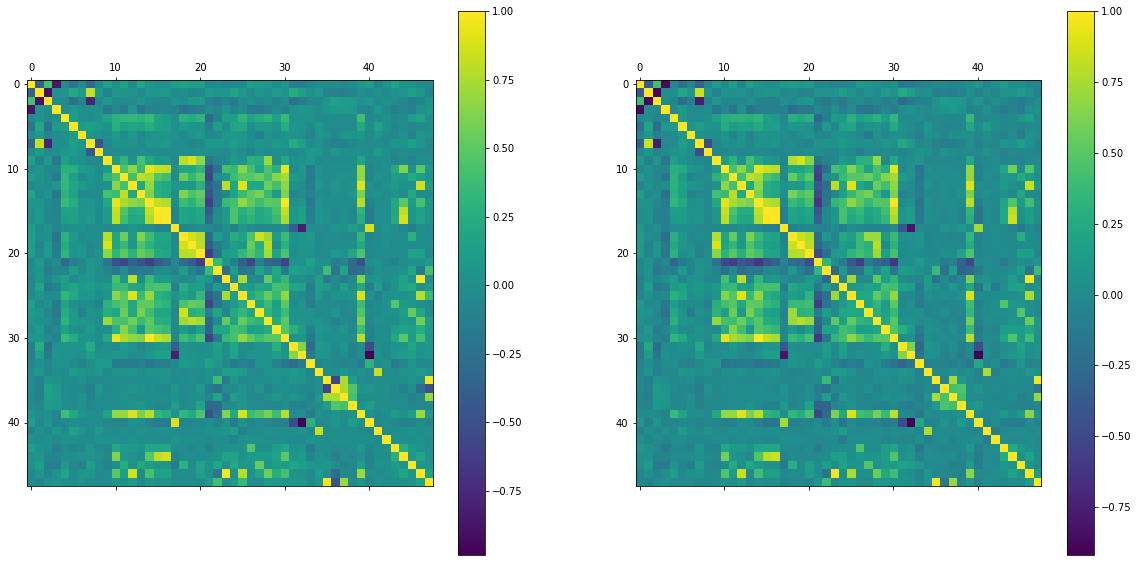

In [61]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))

ax1, ax2 = axes

im1 = ax1.matshow(datos.corr())
im2 = ax2.matshow(datosKNN.corr())

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)

plt.show()

#### The last point is to check all is filled and save the Data ( and also the variables dismissed for any case) 

In [62]:
Outdata.head(n=24)
Outdata.to_csv('/users/Sergio/Downloads/UvigoOutdata.csv')
Outdata.count()

Provincia            374
Fechaconstitución    374
dtype: int64

In [63]:
datosKNN.isnull().sum()

ID                                 0
Añonatural3                        0
Estadodummy                        0
Incubada                           0
ActividadInternacionalDummy        0
CantidadMarcasenpropiedad          0
cnae2d                             0
Edad_días3                         0
año_constitucion                   0
Númeroempleados_mean               0
Activonocorriente_mean             0
Activocorriente_mean               0
Pasivonocorriente_mean             0
Pasivocorriente_mean               0
Totalpatrimonionetoypasivo_mean    0
Patrimonioneto_mean                0
Fondospropios_mean                 0
RatioEndeudamiento_mean            0
Ventasnetas_mean                   0
Gastosdepersonal_mean              0
OtrosGtosExp_mean                  0
Amortizacion_mean                  0
Resultadodeexplotación_mean        0
Resultadofinanciero_mean           0
Efectivo_mean                      0
Gastosfin_mean                     0
InmovMat_mean                      0
A

In [64]:
datosKNN.count()

ID                                 374
Añonatural3                        374
Estadodummy                        374
Incubada                           374
ActividadInternacionalDummy        374
CantidadMarcasenpropiedad          374
cnae2d                             374
Edad_días3                         374
año_constitucion                   374
Númeroempleados_mean               374
Activonocorriente_mean             374
Activocorriente_mean               374
Pasivonocorriente_mean             374
Pasivocorriente_mean               374
Totalpatrimonionetoypasivo_mean    374
Patrimonioneto_mean                374
Fondospropios_mean                 374
RatioEndeudamiento_mean            374
Ventasnetas_mean                   374
Gastosdepersonal_mean              374
OtrosGtosExp_mean                  374
Amortizacion_mean                  374
Resultadodeexplotación_mean        374
Resultadofinanciero_mean           374
Efectivo_mean                      374
Gastosfin_mean           

In [65]:
datosKNN.to_csv('/users/Sergio/Downloads/UvigoKNNrellenado.csv')

### Resume: I got a Data with 380 rows but half got unfilled variables. I applied KNN to predict that data because that algorithm was the appropiate ( multidimensional, better that a simple imputer). For this :

#### I prepared data formats
#### I drop 6 companies without information because they will invent their data applying the imputer as they dont have any relevant variables to take as starting point.The 6 missed enterprises, I was ordered to wait for a research of 6 new enterprises data. 
#### I quit date and location variables ( as location was not relevant as I were told, and date was not too because we got a variable with days alive) and save them in a csv to imput if needed sometime. 
#### I studied density of KNN and find not relevant number of Ks  , so I decided to take an intermediate point near to the mean of the different K imputers means  and  in fact it was a variation of only 1.7% on the biggest unfilled variables, taking the K intermediate inside that variation.  
#### Finally I got 374 /380 enterprises with all data predicted, so a DataBase ready to analyze is: 
### Done.

### SER610